# 'Cowboy Cigarettes' Time Series Case Study - Tier 1

## Brief

You're working in the US federal government as a data scientist in the Health and Environment department. You've been tasked with determining whether sales for the oldest and most powerful producers of cigarettes in the country are increasing or declining. 

**Cowboy Cigarettes (TM, *est.* 1890)** is the US's longest-running cigarette manufacturer. Like many cigarette companies, however, they haven't always been that public about their sales and marketing data. The available post-war historical data runs for only 11 years after they resumed production in 1949; stopping in 1960 before resuming again in 1970. Your job is to use the 1949-1960 data to predict whether the manufacturer's cigarette sales actually increased, decreased, or stayed the same. You need to make a probable reconstruction of the sales record of the manufacturer - predicting the future, from the perspective of the past - to contribute to a full report on US public health in relation to major cigarette companies. 

The results of your analysis will be used as part of a major report relating public health and local economics, and will be combined with other studies executed by your colleagues to provide important government advice.  

-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest.  

**1. Sourcing and loading** 
- Load relevant libraries 
- Load the data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Dropping unwanted columns
- Nomenclature
- Type conversions
- Making a predictor variable `y` 
- Getting summary statistics for `y`
- Plotting `y`
  
  
**3. Modelling** 
- Decomposition
    - Trend
    - Seasonality
    - Noise
- Testing for stationarity with KPSS
- Making the data stationary
- The ARIMA Model
    - Make a function to find the MSE of a single ARIMA model
    - Make a function to evaluate the different ARIMA models with different p, d, and q values
- Visualize the results
- Application: Forecasting

**4. Evaluating and concluding** 
- What is our conclusion?
- Next steps
    

## 0. Preliminaries 

Time series data is just any data displaying how a single variable changes over time. It comes as a collection of metrics typically taken at regular intervals. Common examples of time series data include weekly sales data and daily stock prices. You can also easily acquire time series data from [Google Trends](https://trends.google.com/trends/?geo=US), which shows you how popular certain search terms are, measured in number of Google searches. 

## 1. Sourcing and Loading

### 1a. Load relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

C:\Users\nicho\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\nicho\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
#first we import the necessary libraries pandas, numpy and matplotlib

### 1b. Load the data
Call the variable `cigData`. 

In [2]:


# Assuming 'cigdata.csv' is the filename, adjust it if your file has a different name or extension
cigdata = pd.read_csv('CowboyCigsData.csv')

# Display the first few rows of the DataFrame to verify that it has been loaded correctly
print(cigdata.head())
print(cigdata)

   Unnamed: 0     Time  #CigSales
0           0  1949-01    1000112
1           1  1949-02    1000118
2           2  1949-03    1000132
3           3  1949-04    1000129
4           4  1949-05    1000121
     Unnamed: 0     Time  #CigSales
0             0  1949-01    1000112
1             1  1949-02    1000118
2             2  1949-03    1000132
3             3  1949-04    1000129
4             4  1949-05    1000121
..          ...      ...        ...
139         139  1960-08    1000606
140         140  1960-09    1000508
141         141  1960-10    1000461
142         142  1960-11    1000390
143         143  1960-12    1000432

[144 rows x 3 columns]


In [ ]:
# creating a variable called 'cigdata' which is going to be our dataset in csv format
#So, we then have to read the csv file using hte 'read function'
#Then print the variable 'cigdata' to ensure that it works.

### 1c. Explore the data
We now need to check whether the data conduces to a time series style analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  144 non-null    int64         
 1   Time        144 non-null    datetime64[ns]
 2   #CigSales   144 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.5 KB
None


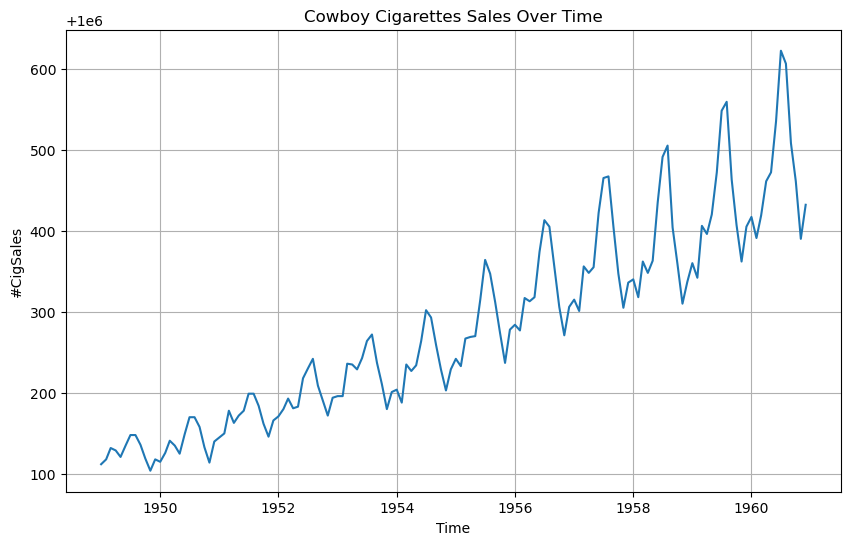

In [3]:

# Convert date column to datetime if needed
cigdata ['Time'] = pd.to_datetime(cigdata['Time'])

# Check for missing values
print(cigdata.info())

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(cigdata['Time'], cigdata['#CigSales'])
plt.title('Cowboy Cigarettes Sales Over Time')
plt.xlabel('Time')
plt.ylabel('#CigSales')
plt.grid(True)
plt.show()

In [ ]:
#Ok we now have the cigdata variable defined from above. We will use this df to convert the 'time' column to a 'datetime'
#We printed out the variable passing info which will describe the data types in each column
#Next we plot
#Using the function plt.figure, plt.plot etc
#We assign a the standard size for the plot (10,6)
#Here we rely on the matplotlib library to carry out these functions
#plt.grid(true) = shows the lines of the chart for better reading and output

Over a million cigarettes sold in the month of January 1949. This certainly is a popular cigarette brand. 

Check out the columns feature of the data. How many columns are there? 

In [4]:

# Get the number of columns
num_columns = cigdata.shape[1]

print("Number of columns:", num_columns)

Number of columns: 3


In [ ]:
#Above we are still working with the cigdata variable. 
#We create a new variable called num_columns- to check the number of columns in cigdata set 
#use the expression cigdata.shape[] 
#Use the print function to lable the output as "number of columns" and pass the num_columns variable from above 

In [5]:
print(cigdata.columns)

Index(['Unnamed: 0', 'Time', '#CigSales'], dtype='object')


Let's check out the data types of our columns.

In [6]:
print(cigdata.dtypes)


Unnamed: 0             int64
Time          datetime64[ns]
#CigSales              int64
dtype: object


Check whether there are any null values. 

In [7]:
print(cigdata.isnull().values.any())

False


In [ ]:
#To check the null values we use the isnull() function and values.any() function and call in the cigdata variable in which these functions will apply

## 2. Cleaning, transforming and visualizing

### 2a. Dropping unwanted columns
We need to cut that `Unnamed: 0` column. Delete it here.

In [8]:
del cigdata['Unnamed: 0']


### 2b. Nomenclature

We can see that the `Time` column actually has the granularity of months. Change the name of that column to `Month`.

In [9]:
cigdata


,Time,#CigSales
0,1949-01-01,1000112
1,1949-02-01,1000118
2,1949-03-01,1000132
3,1949-04-01,1000129
4,1949-05-01,1000121
...,...,...
139,1960-08-01,1000606
140,1960-09-01,1000508
141,1960-10-01,1000461
142,1960-11-01,1000390


In [10]:

cigdata.columns = ['Month', '#CigSales'] 




# Check the first few rows after conversion
print(cigdata.head())

       Month  #CigSales
0 1949-01-01    1000112
1 1949-02-01    1000118
2 1949-03-01    1000132
3 1949-04-01    1000129
4 1949-05-01    1000121


In [ ]:
#Above we have the cigdata data frame in which we are calling two columns in which we want to see an output for
#These columns are 1. 'Month' 2. '#cigsales' 
#We also changed the 'time' column to 'month' for time series analysis

### 2c. Type conversions 

Now, do time series analysis on a Pandas dataframe is overkill, and is actually counter-productive. It's much more easy to carry out this type of analysis if we convert our data to a series first.

Notice that the `Month` field was an object. Let's type convert the `Month` column to a Python `datetime`, before making that the index.

In [11]:
cigdata['Month'] = pd.to_datetime(cigdata['Month'])
cigdata.set_index('Month', inplace = True)


### 2d. Making a predictor variable `y`

The data is now indexed by date, as time series data ought to be.

Since we want to predict the number of cigarette sales at Cowboy cigarettes, and `y` is typically used to signify a predictor variable, let's create a new variable called `y` and assign the indexed #Passenger column. 

Check the type of our new variable. 

In [45]:
# Creating predictor variable y
y = cigdata['#CigSales']  

# Check the type of y
print(type(y))

print(y)

<class 'pandas.core.series.Series'>
Month
1949-01-01    1000112
1949-02-01    1000118
1949-03-01    1000132
1949-04-01    1000129
1949-05-01    1000121
               ...   
1960-08-01    1000606
1960-09-01    1000508
1960-10-01    1000461
1960-11-01    1000390
1960-12-01    1000432
Name: #CigSales, Length: 144, dtype: int64


In [ ]:
#Above we create a 'y' variable in which we will later plot in the time series plot named 'cigsales'

In [13]:
print(cigdata.columns)

Index(['#CigSales'], dtype='object')


In [ ]:
#Above we are checking the column that was passed in the cigdata dataframe and variable named 'y'

### 2e. Getting summary statistics for `y`

Get the summary statistics of our data here. 

In [14]:
cigdata.describe()

,#CigSales
count,1.440000e+02
mean,1.000280e+06
std,1.199663e+02
min,1.000104e+06
25%,1.000180e+06
50%,1.000266e+06
75%,1.000360e+06
max,1.000622e+06


In [15]:
# Get the summary statistics of the data
summary_statistics = y.describe()
print(summary_statistics)

count    1.440000e+02
mean     1.000280e+06
std      1.199663e+02
min      1.000104e+06
25%      1.000180e+06
50%      1.000266e+06
75%      1.000360e+06
max      1.000622e+06
Name: #CigSales, dtype: float64


Try visualizing the data. A simple `matplotlib` plot should do the trick.  

### 2f. Plotting `y`

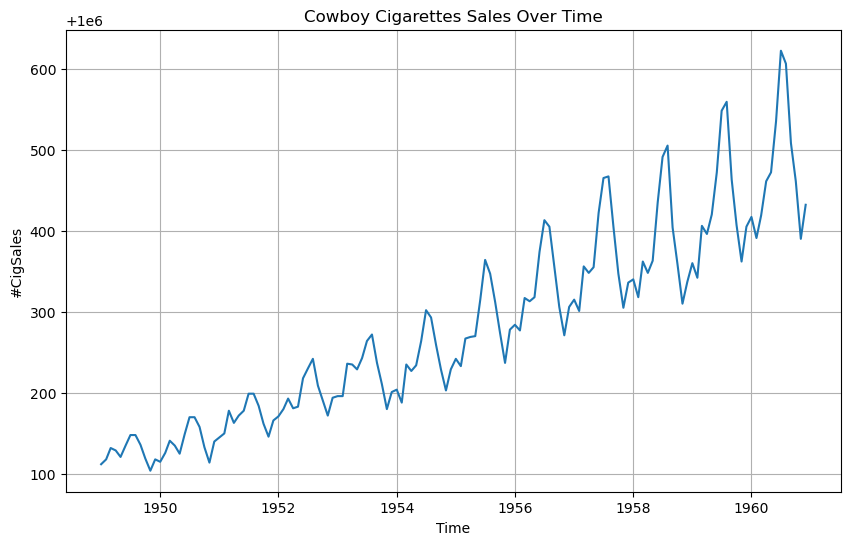

In [16]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(y)
plt.title('Cowboy Cigarettes Sales Over Time')
plt.xlabel('Time')
plt.ylabel('#CigSales')
plt.grid(True)
plt.show()

## 3. Modelling 
### 3a. Decomposition
What do you notice from the plot? Take at least `2` minutes to examine the plot, and write down everything you observe.  

All done?

We can see that, generally, there is a trend upwards in cigarette sales from at Cowboy Cigarettes. But there are also some striking - and perhaps unexpected - seasonal fluctuations. These seasonal fluctations come in a repeated pattern. Work out when these seasonal fluctuations are happening, and take 2 minutes to hypothesize on their cause here.

What does it mean to *decompose* time series data? It means breaking that data into 3 components: 

1. **Trend**: The overall direction that the data is travelling in (like upwards or downwards)
2. **Seasonality**: Cyclical patterns in the data 
3. **Noise**: The random variation in the data

We can treat these components differently, depending on the question and what's appropriate in the context. They can either be added together in an *additive* model, or multiplied together in a *multiplicative* model. 

Make a coffee, take `5` minutes and read [this article](https://medium.com/@sigmundojr/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7) and think about whether our data would conduce to an additive or multiplicative model here. Write your conclusion down just here: 

-------------------------------

All done? Well, just on the basis of the plot above, it seems our Cowboy Cigarettes data is actually multiplicative. 

That's because, as time progresses, the general trend seems to be increasing *at a rate that's also increasing*. We also see that the seasonal fluctuations (the peaks and troughs) get bigger and bigger as time progresses.

Now on the other hand, if the data were simply additive, we could expect the general trend to increase at a *steadily*, and a constant speed; and also for seasonal ups and downs not to increase or decrease in extent over time.

Happily, we can use the `decompose()` function to quantify the component parts described above in our data.

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


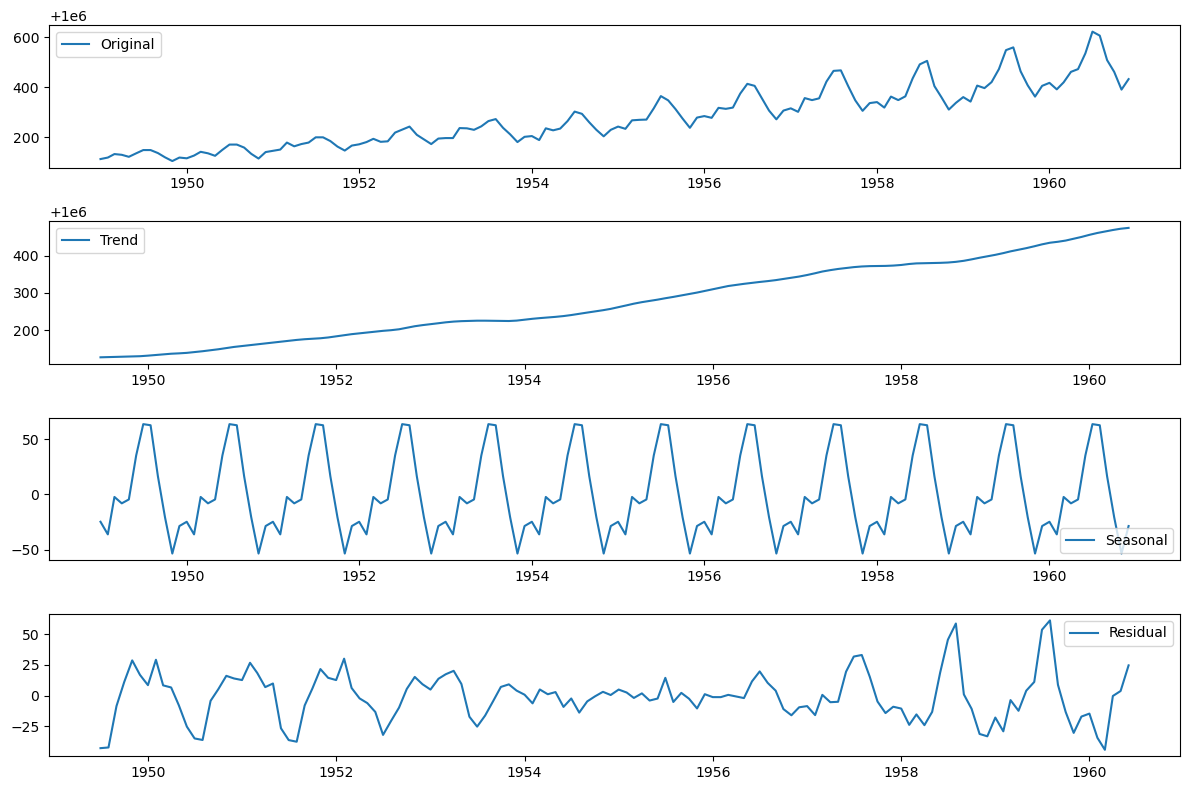

Mean of Trend Component: 1000278.0012626261
Mean of Seasonal Component: -1.9737298215558337e-16
Mean of Residual Component: -0.7512626262005971


In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose






# Decompose the time series data into trend, seasonal, and residual components
decomposition = seasonal_decompose(y, model='')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Print the mean of each component
print("Mean of Trend Component:", trend.mean())
print("Mean of Seasonal Component:", seasonal.mean())
print("Mean of Residual Component:", residual.mean())

### 3b. Testing for stationarity with KPSS
As you know, when doing time series analysis we always have to check for stationarity. Imprecisely, a time series dataset is stationary just if its statistical features don't change over time. A little more precisely, a stationary time series dataset will have constant mean, variance, and covariance.

There are many ways to test for stationarity, but one of the most common is the KPSS test. The Null hypothesis of this test is that the time series data in question is stationary; hence, if the *p*-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

In [18]:
from statsmodels.tsa.stattools import kpss

# Use kpss() to test for stationarity
kpss_test_result = kpss(y)

# Print the result
print("KPSS Statistic:", kpss_test_result[0])
print("p-value:", kpss_test_result[1])
print("Lags Used:", kpss_test_result[2])
print("Critical Values:", kpss_test_result[3])

# Compare p-value with significance level (e.g., 0.05) to determine stationarity
if kpss_test_result[1] < 0.05:
    print("Reject the null hypothesis. The data is not stationary.")
else:
    print("Fail to reject the null hypothesis. The data is stationary.")

KPSS Statistic: 1.651312235417082
p-value: 0.01
Lags Used: 8
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject the null hypothesis. The data is not stationary.


C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [19]:
kpss(y)

C:\Users\nicho\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.651312235417082,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data. 

But our data need to be stationary! So we need to do some transforming.

### 3c. Making the data stationary 
Let's recall what it looks like. 

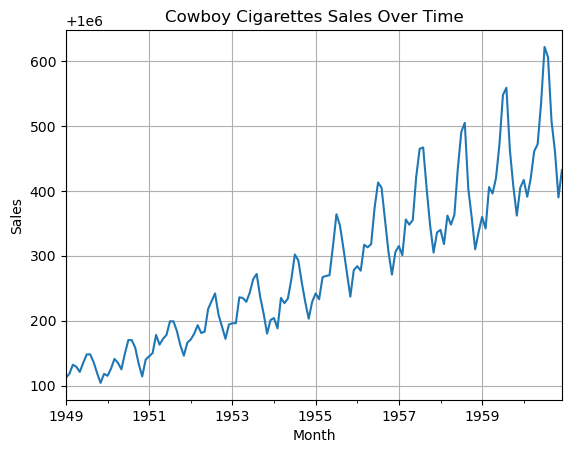

In [20]:
# Plot the data
y.plot()
plt.title('Cowboy Cigarettes Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

##TIme series plot ##

In our plot, we can see that both the mean and the variance *increase as time progresses*. At the moment, our data has neither a constant mean, nor a constant variance (the covariance, however, seems constant). 

One ofte  used way of getting rid of changing variance is to take the natural log of all the values in our dataset. Let's do this now. 

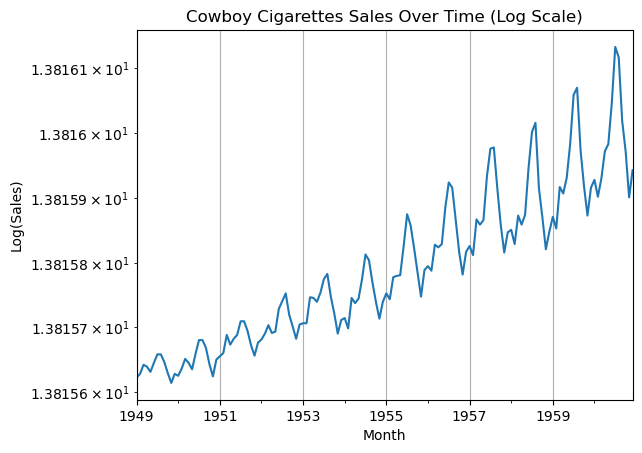

In [26]:
# Plot the log-transformed data

y_log = np.log(y)

# Plot the log-transformed data
y_log.plot()
plt.title('Cowboy Cigarettes Sales Over Time (Log Scale)')
plt.xlabel('Month')
plt.ylabel('Log(Sales)')
plt.grid(True)
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

In [27]:
# the above is NOT correct- I reached out to TA to rectify the code and help with creating a log curve.


When you plot this, you can see how the variance in our data now remains contant over time.

We now have a constant variance, but we also need a constant mean.

We can do this by *differencing* our data. We difference a time series dataset when we create a new time series comprising the difference between the values of our existing dataset.

Python is powerful, and we can use the `diff()` function to do this. You'll notice there's one less value than our existing dataset (since we're taking the difference between the existing values).

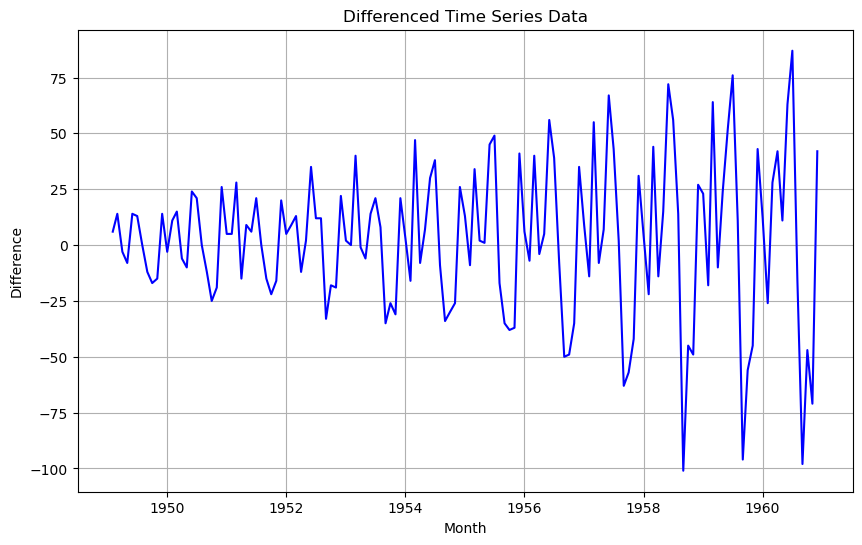

In [29]:
# Compute the difference of the time series data
differenced_data = cigdata['#CigSales'].diff()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(differenced_data, 'b')
plt.title('Differenced Time Series Data')
plt.xlabel('Month')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

#Model prideicted plot need to create this

In [31]:



y_log_series = pd.Series(y_log)

# Difference the log-transformed data
y_log_diff = y_log_series.diff().dropna()

print(y_log_diff)

Month
1949-02-01    0.000006
1949-03-01    0.000014
1949-04-01   -0.000003
1949-05-01   -0.000008
1949-06-01    0.000014
                ...   
1960-08-01   -0.000016
1960-09-01   -0.000098
1960-10-01   -0.000047
1960-11-01   -0.000071
1960-12-01    0.000042
Name: #CigSales, Length: 143, dtype: float64


Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary.

### 3d. The ARIMA model

Recall that ARIMA models are based around the idea that it's possible to predict the next value in a time series by using information about the most recent data points. It also assumes there will be some randomness in our data that can't ever be predicted.

We can find some good parameters for our model using the `sklearn` and `statsmodels` libraries, and in particular `mean_squared_error` and `ARIMA`. 

#### 3di. Make a function to find the MSE of a single ARIMA model

In [3]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA


def evaluate_arima_model(actual_values, p, d, q, forecast_periods):
    """
    Evaluate ARIMA model with given parameters (p, d, q).
    
    Parameters:
    actual_values (array-like): Actual values of the time series.
    p (int): AR order (autoregressive).
    d (int): I order (integrated or differencing).
    q (int): MA order (moving average).
    forecast_periods (int): Number of periods to forecast.
    
    Returns:
    float: Mean squared error (MSE) of the ARIMA model.
    """
    # Split data into training and testing sets
    train_size = int(len(actual_values) * 0.8)  # 80% training data
    train, test = actual_values[:train_size], actual_values[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()
    
    # Make predictions
    forecast = model_fit.forecast(steps=forecast_periods)
    
    # Calculate MSE
    mse = mean_squared_error(test[:forecast_periods], forecast)
    
    return mse
    

#### 3dii. Make a function to evaluate the different ARIMA models with different p, d, and q values

In [4]:
import numpy as np

def evaluate_arima_models(actual_values, p_values, d_values, q_values, forecast_periods):
    """
    Evaluate multiple ARIMA models with different (p, d, q) parameters.
    
    Parameters:
    actual_values (array-like): Actual values of the time series.
    p_values (list): List of AR order values (autoregressive).
    d_values (list): List of I order values (integrated or differencing).
    q_values (list): List of MA order values (moving average).
    forecast_periods (int): Number of periods to forecast.
    
    Returns:
    dict: Dictionary containing the best ARIMA model parameters and its corresponding MSE.
    """
    best_mse = float('inf')
    best_params = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    mse = evaluate_arima_model(actual_values, p, d, q, forecast_periods)
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {'p': p, 'd': d, 'q': q}
                except:
                    continue
    
    return {'best_params': best_params, 'best_mse': best_mse}

So the best p,d, q, parameters for our ARIMA model are 2, 1, 1 respectively. Now we know this, we can build the model.

We can take a look at a summary of the model this library has built around our data.

### 3e. Visualize the results 

Visualize the original dataset plotted against our model. 

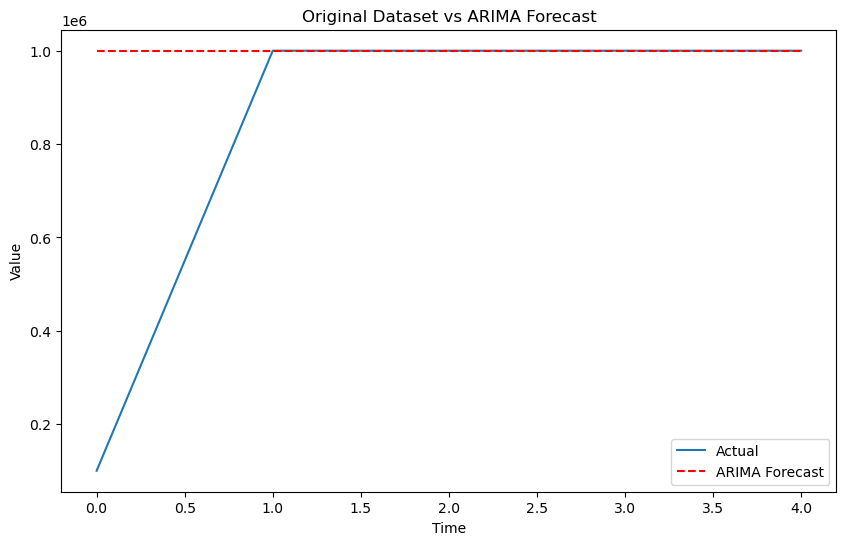

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your dataset is stored in 'actual_values'
actual_values = [100112,1000118,1000132,1000129,1000121]  # Need to plug in values- these were the values from the time series graph

# Fit ARIMA model
model = ARIMA(actual_values, order=(2, 1, 1))
model_fit = model.fit()

# Get forecasted values
forecast = model_fit.forecast(steps=len(actual_values))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(forecast, color='red', linestyle='--', label='ARIMA Forecast')
plt.title('Original Dataset vs ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### 3f. Application: Forecasting

We've done well: our model fits pretty closely to our existing data. Let's now use it to forecast what's likely to occur in future.

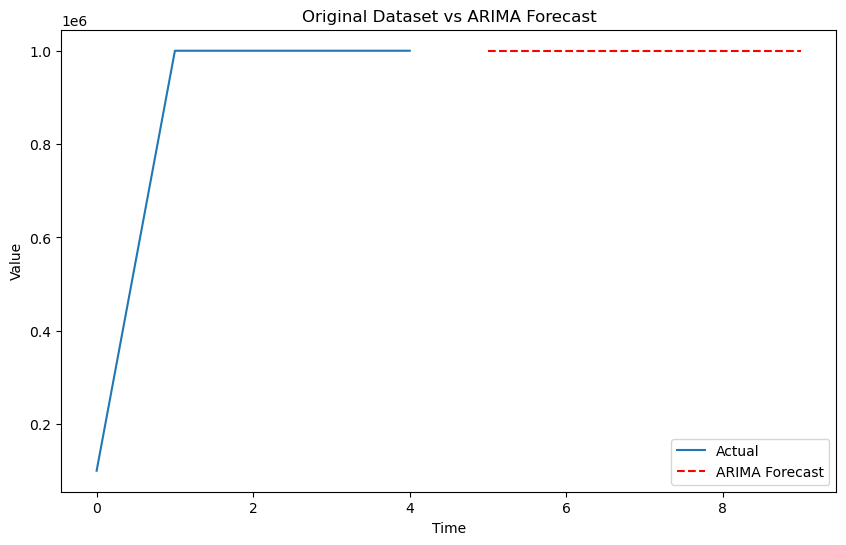

Forecasted values: [1000120.12301057 1000120.03257139 1000120.02328441 1000120.02233104
 1000120.02223317]


In [6]:

actual_values = [100112,1000118,1000132,1000129,1000121]  

# Fit ARIMA model
model = ARIMA(actual_values, order=(2, 1, 1))
model_fit = model.fit()

# Number of periods to forecast
forecast_periods = 5  # Change this according to your requirement

# Get forecasted values
forecast = model_fit.forecast(steps=forecast_periods)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(range(len(actual_values), len(actual_values) + forecast_periods), forecast, color='red', linestyle='--', label='ARIMA Forecast')
plt.title('Original Dataset vs ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Forecasted values:", forecast)

## 4. Evaluating and Concluding

Our model captures the centre of a line that's increasing at a remarkable rate. Cowboy Cigarettes sell more cigarettes in the summer, perhaps due to the good weather, disposable income and time off that people enjoy, and the least in the winter, when people might be spending less and enjoying less free time outdoors. 

Remarkably, our ARIMA model made predictions using just one variable. We can only speculate, however, on the causes of the behaviour predicted by our model. We should also take heed that spikes in data, due to sudden unusual circumstances like wars, are not handled well by ARIMA; and the outbreak of the Vietnam War in the 1960s would likely cause our model some distress.  

We could suggest to our employers that, if they are interested in discovering the causes of the cigarette sales trajectory, they execute a regression analysis in addition to the time series one. 